<a href="https://colab.research.google.com/github/mrtkp9993/QuantitaveFinanceExamplesPy/blob/main/03_principal_component_analysis_on_returns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pd.set_option('use_inf_as_na', True)

In [3]:
bist30h = [
           'TUPRS.IS', 
           'VAKBN.IS',
           'KRDMD.IS',
           'DOHOL.IS',
           'AKBNK.IS',
           'TKFEN.IS',
           'FROTO.IS',
           'GARAN.IS',
           'KOZAA.IS',
           'HALKB.IS',
           'TCELL.IS',
           'KOZAL.IS',
           'VESTL.IS',
           'YKBNK.IS',
           'TTKOM.IS',
           'BIMAS.IS',
           'PETKM.IS',
           'SISE.IS',
           'ARCLK.IS',
           'EREGL.IS',
           'SASA.IS',
           'SAHOL.IS',
           'EKGYO.IS',
           'THYAO.IS',
           'PGSUS.IS',
           'ISCTR.IS',
           'KCHOL.IS',
           'ASELS.IS',
           'TAVHL.IS',
           'GUBRF.IS',
]

In [4]:
df = yf.download(
    tickers = ' '.join(bist30h),
    period = "max",
    start = "2013-02-01"
)

df.clip(lower=0, inplace=True)
df.fillna(0, inplace=True)
df = df['Adj Close']

[*********************100%***********************]  30 of 30 completed


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


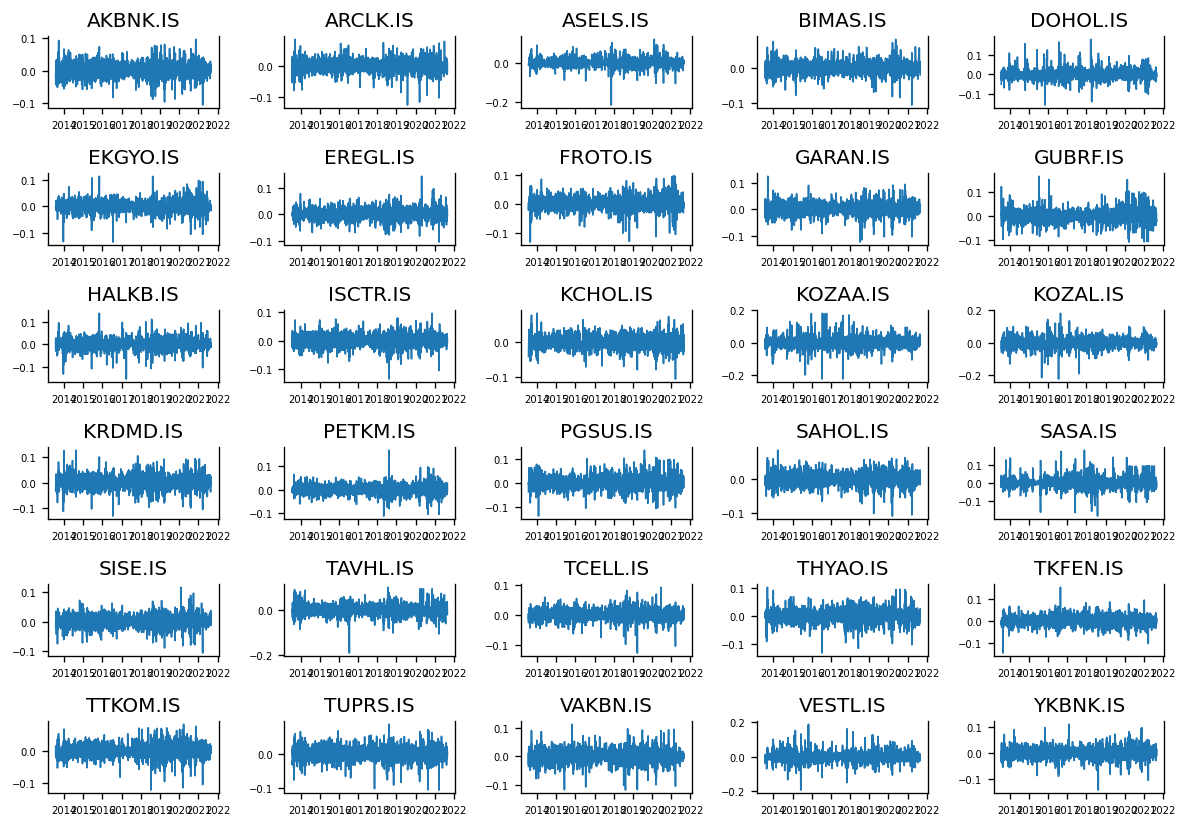

In [5]:
# Returns
df_ret = (np.log(df) - np.log(df.shift(1))).dropna()

fig, axes = plt.subplots(nrows=6, ncols=5, dpi=120, figsize=(10,7))
for i, ax in enumerate(axes.flatten()):
  data = df_ret[df_ret.columns[i]]
  ax.plot(data, linewidth=1)
  ax.set_title(df_ret.columns[i])
  ax.spines["top"].set_alpha(0)
  ax.tick_params(labelsize=6)
plt.tight_layout();

In [6]:
df_ret.describe()

,AKBNK.IS,ARCLK.IS,ASELS.IS,BIMAS.IS,DOHOL.IS,EKGYO.IS,EREGL.IS,FROTO.IS,GARAN.IS,GUBRF.IS,HALKB.IS,ISCTR.IS,KCHOL.IS,KOZAA.IS,KOZAL.IS,KRDMD.IS,PETKM.IS,PGSUS.IS,SAHOL.IS,SASA.IS,SISE.IS,TAVHL.IS,TCELL.IS,THYAO.IS,TKFEN.IS,TTKOM.IS,TUPRS.IS,VAKBN.IS,VESTL.IS,YKBNK.IS
count,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000
mean,0.000025,0.000631,0.001036,0.000746,0.000683,0.000034,0.001506,0.001080,0.000141,0.001456,-0.000475,0.000153,0.000504,0.000519,0.000604,0.001038,0.001031,0.000502,0.000189,0.002444,0.000971,0.000476,0.000505,0.000375,0.000608,0.000338,0.000634,-0.000085,0.001314,-0.000033
std,0.021459,0.019975,0.021528,0.016590,0.025915,0.021513,0.020711,0.022765,0.022806,0.026885,0.023366,0.020401,0.017797,0.035109,0.030994,0.026070,0.020382,0.028100,0.018603,0.030536,0.020246,0.023853,0.017711,0.023270,0.022399,0.020196,0.019155,0.022974,0.029568,0.020984
min,-0.104985,-0.125868,-0.214952,-0.105360,-0.156843,-0.134454,-0.105089,-0.131401,-0.123981,-0.107030,-0.153874,-0.134796,-0.104683,-0.223144,-0.222579,-0.130620,-0.111663,-0.139762,-0.107760,-0.180811,-0.105361,-0.190463,-0.128149,-0.134491,-0.148194,-0.120871,-0.105250,-0.117141,-0.192372,-0.140286
25%,-0.012210,-0.010435,-0.009451,-0.008176,-0.013072,-0.010889,-0.010744,-0.010582,-0.012739,-0.011929,-0.012208,-0.010428,-0.009524,-0.017242,-0.015267,-0.013739,-0.009828,-0.014458,-0.010215,-0.011542,-0.010390,-0.012568,-0.008996,-0.012095,-0.011976,-0.010399,-0.009859,-0.012048,-0.012903,-0.011377
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000655,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.011673,0.011472,0.010538,0.009195,0.012579,0.011173,0.013393,0.013378,0.012724,0.013483,0.011281,0.011858,0.011224,0.015614,0.016273,0.015038,0.011811,0.014815,0.011050,0.013792,0.012739,0.013175,0.010182,0.013423,0.014009,0.010850,0.010998,0.012804,0.014320,0.011730
max,0.096114,0.088479,0.121545,0.082469,0.178483,0.113455,0.144163,0.095310,0.124012,0.166084,0.136381,0.095752,0.082888,0.182322,0.182322,0.127834,0.167054,0.134264,0.084168,0.181189,0.115769,0.102228,0.092234,0.103436,0.153290,0.082997,0.087237,0.111352,0.189382,0.109589


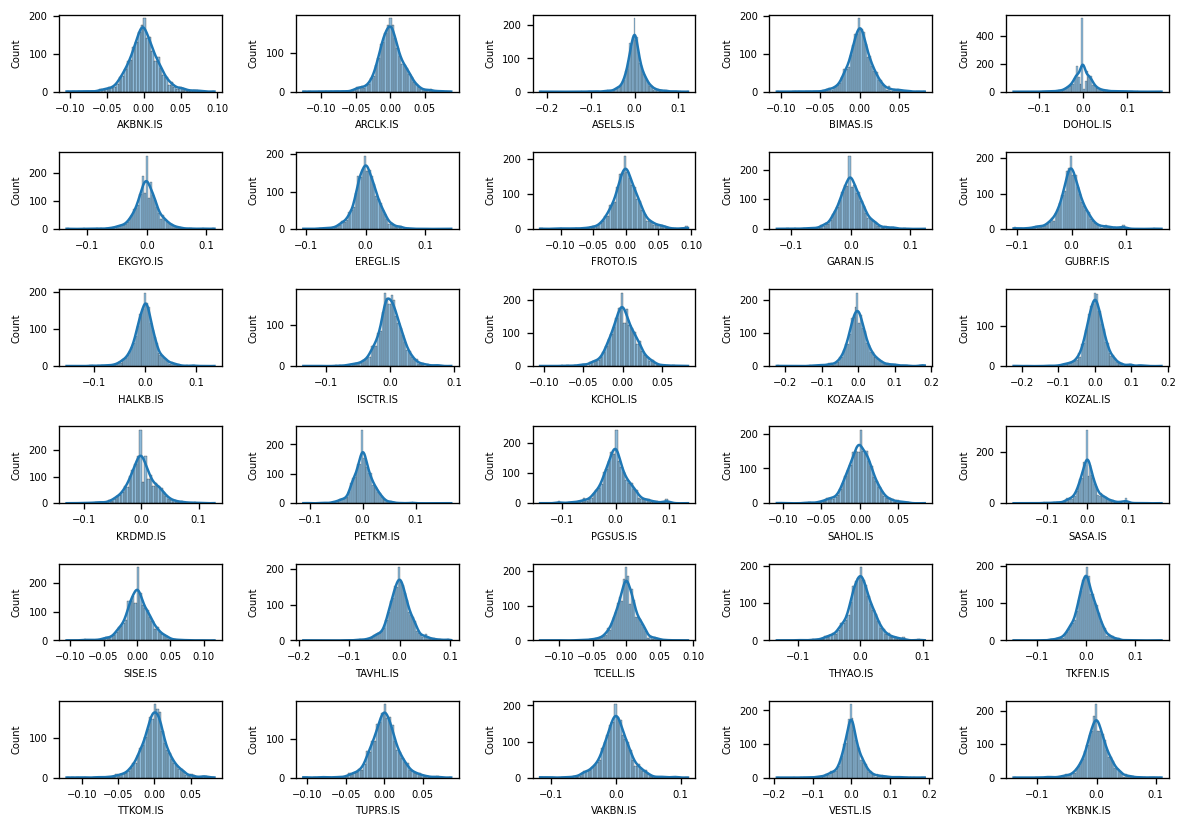

In [7]:
plt.rcParams["axes.labelsize"] = 6
plt.rcParams["xtick.labelsize"] = 6
plt.rcParams["ytick.labelsize"] = 6

fig, axes = plt.subplots(nrows=6, ncols=5, dpi=120, figsize=(10,7))
for i, ax in enumerate(axes.flatten()):
  data = df_ret[df_ret.columns[i]]
  sns.histplot(data, ax=ax, kde=True)
plt.tight_layout();

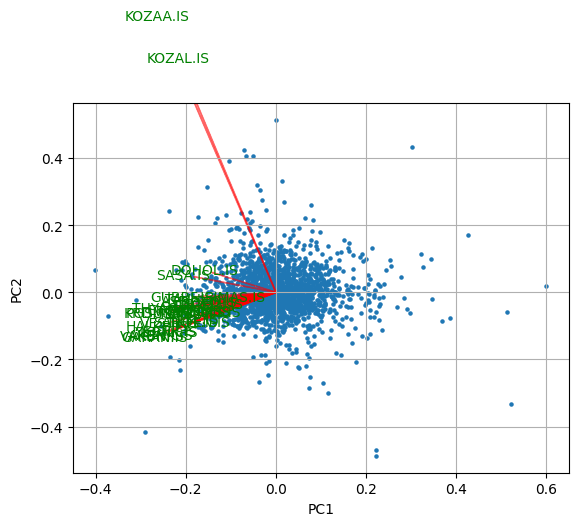

In [8]:
# https://ostwalprasad.github.io/machine-learning/PCA-using-python.html
plt.style.use('default')

pcamodel = PCA(n_components=2)
pca = pcamodel.fit_transform(df_ret)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

myplot(pca[:,0:2],np.transpose(pcamodel.components_[0:2, :]),list(df_ret.columns))
plt.show()